# Take Input

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import sparse

# Read the data 
data = np.loadtxt('graph.mtx',delimiter=' ').astype(int)
arr = np.zeros((data[0][0],data[0][1]))

# Generate the Graph
for i in range(1,data.shape[0]):
    arr[data[i][0]-1][data[i][1]-1] = 1
graph = sparse.csr_matrix(arr)
G = nx.from_scipy_sparse_array(graph)

# Generate the layout and the reference distances
d_ij = dict(nx.all_pairs_dijkstra_path_length(G))
X = np.random.rand(data[0][0],2)
  

1439771289600858.0


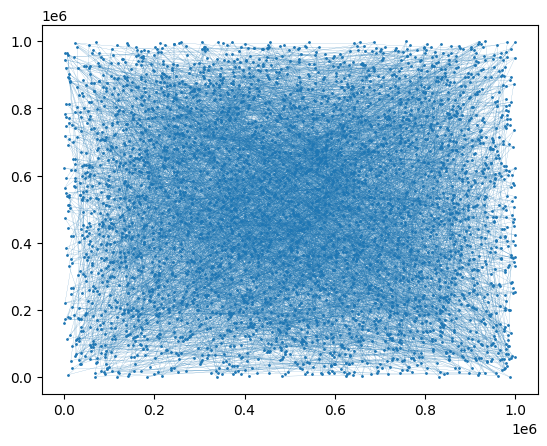

In [104]:
from matplotlib.collections import LineCollection


X = np.random.rand(data[0][0],2)*1000000

#Function to do gradient Descent
def sgd(X, G, d_ij, eta):
    edges = list(G.edges())
    error = []
    for step in eta:
        np.random.shuffle(edges)
        for (i,j) in edges:
            if i!= j:
                r = (X[i]-X[j])*(np.sqrt((X[i][0]-X[j][0])**2 + (X[i][1]-X[j][1])**2)- d_ij[i][j])/(2*(np.sqrt((X[i][0]-X[j][0])**2 + (X[i][1]-X[j][1])**2)))
                if np.count_nonzero(np.isnan(r)) > 0:
                    print((i,j))
                    print(r)
                    print(X[i])
                    print(X[j])
                    raise Exception("Fail")
                X[i] -= step*r/d_ij[i][j]**2
                X[j] += step*r
        error.append(stress(X,G,d_ij))
        print(error[-1])        
    return X,error


#Function to return the stress of the layout
def stress(X, G, d_ij):
    return sum([(np.sqrt((X[i][0]-X[j][0])**2 + (X[i][0]-X[j][0])**2)- d_ij[i][j])**2 for (i,j) in G.edges()])

#Function to create a plot of graph G given Layout X
def plot(X,G):
    edges = [[(X[i][0],X[i][1]),(X[j][0],X[j][1])] for (i,j) in G.edges()]
    ax = plt.subplot()
    ax.add_collection(LineCollection(edges, linewidth = 0.1))
    ax.scatter(X[: , 0], X[: , 1], s=1)
    ax.autoscale()
    plt.show()

print(stress(X,G,d_ij))
plot(X,G)


2754957655.432395
2884290657.9357996
2876678631.776925
2879016295.6792645
2796180274.0131574
2894617222.9474354
2846636077.885329
2849586301.936223
2769528116.0626264
2803411553.5873556
2772305046.073727
2766675608.0793276
2809898504.1509156
2770682553.252824
2756913129.0088167
2740203663.122014
2703330968.323004
2804568262.496058
2712348346.1213994
2721828695.7622714
2698816062.8856964
2751120364.387487
2748882740.212653
2714642103.5641913
2668100603.7936
2654288029.908483
2698845668.082926
2699358811.419825
2637182301.2941613
2633873243.5837374
2633658253.4968634
2611860613.6050334
2602635463.953031
2600763495.2890525
2700342218.8963747
2692682028.142703
2576676600.8646455
2635303567.7680855
2604297669.580224
2571945943.867907
2570879555.575219
2519559334.183592
2508055193.970032
2622915018.086999
2519599791.943753
2613818151.785251
2542174425.7963066
2496577825.458051
2463863910.8390617
2547456229.3439198
2497683594.1903963
2489174276.5458975
2462504457.7742033
2516630534.9709187
24

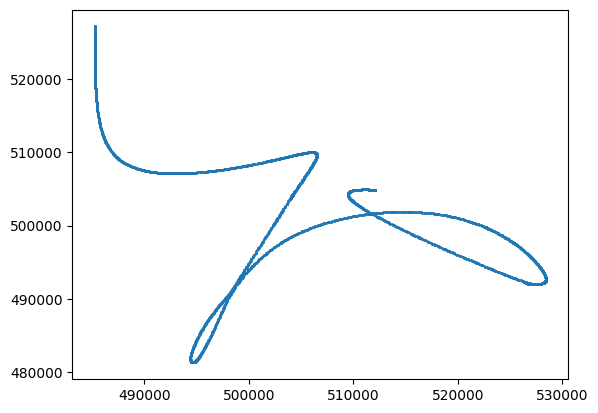

In [110]:
x = 1000
(Y,error) = sgd(X,G,d_ij,[1 for i in range(5*x)]+[1/2 for i in range(2*x)] + [0.1 for i in range(x)])
print(stress(Y, G, d_ij))
plot(Y,G)


In [112]:
f = open("input.mtx", 'a+')
f.write(f'{len(G.nodes())} {len(G.edges()) - 3} \n')
for (i,j) in G.edges():
    if i!= j:
        f.write(f'{i} {j} {int(d_ij[i][j])}\n')
f.close()

In [111]:
for (i,j) in G.edges():
    if i==j:
        print(i,j)

360 360
620 620
791 791
